In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data/college_student_placement_dataset.csv")

In [16]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [18]:
df["Placement"] = df["Placement"].replace(["Yes", "No"], [1, 0])
df = pd.get_dummies(df, columns=["Internship_Experience"], dtype="int")

In [19]:
df.isna().sum()

College_ID                   0
IQ                           0
Prev_Sem_Result              0
CGPA                         0
Academic_Performance         0
Extra_Curricular_Score       0
Communication_Skills         0
Projects_Completed           0
Placement                    0
Internship_Experience_No     0
Internship_Experience_Yes    0
dtype: int64

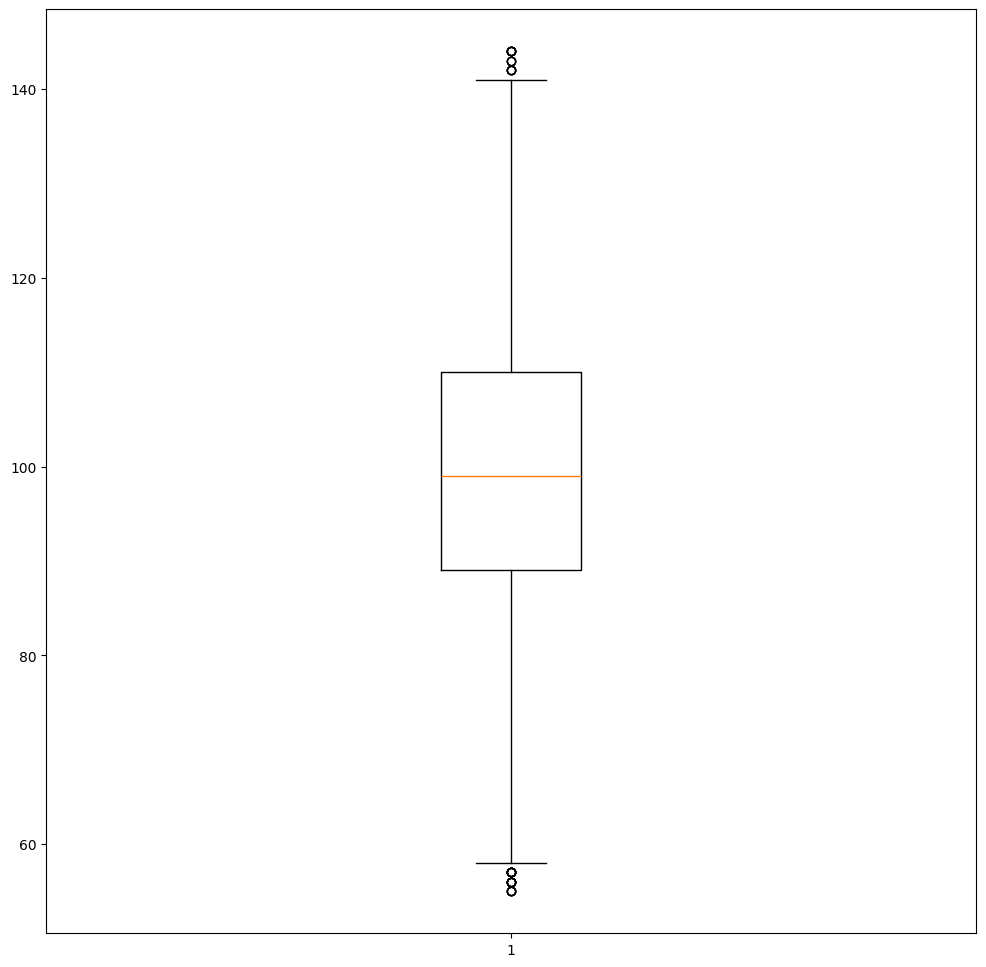

In [22]:
plt.figure(figsize=(12,12))
plt.boxplot(x=df["IQ"])
plt.show()

In [21]:
df = df[((df["IQ"] > 54) & (df["IQ"] <  145))]

In [25]:
df.drop(columns=["College_ID"]).corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Internship_Experience_No,Internship_Experience_Yes
IQ,1.000000,-0.000968,-0.000859,-0.009433,-0.004128,-0.012112,0.016498,0.284935,-0.000607,0.000607
Prev_Sem_Result,-0.000968,1.000000,0.980772,-0.005269,0.009595,-0.017194,0.017949,0.317817,0.013000,-0.013000
CGPA,-0.000859,0.980772,1.000000,-0.002380,0.011613,-0.018068,0.020358,0.321711,0.012160,-0.012160
Academic_Performance,-0.009433,-0.005269,-0.002380,1.000000,0.011602,-0.019883,-0.013087,-0.015444,-0.025499,0.025499
Extra_Curricular_Score,-0.004128,0.009595,0.011613,0.011602,1.000000,0.003331,0.007908,-0.005106,-0.001640,0.001640
Communication_Skills,-0.012112,-0.017194,-0.018068,-0.019883,0.003331,1.000000,-0.003799,0.323078,0.020779,-0.020779
Projects_Completed,0.016498,0.017949,0.020358,-0.013087,0.007908,-0.003799,1.000000,0.218105,0.009933,-0.009933
Placement,0.284935,0.317817,0.321711,-0.015444,-0.005106,0.323078,0.218105,1.000000,0.004982,-0.004982
Internship_Experience_No,-0.000607,0.013000,0.012160,-0.025499,-0.001640,0.020779,0.009933,0.004982,1.000000,-1.000000
Internship_Experience_Yes,0.000607,-0.013000,-0.012160,0.025499,0.001640,-0.020779,-0.009933,-0.004982,-1.000000,1.000000


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, log_loss, accuracy_score

In [69]:
X= df[["IQ", "Prev_Sem_Result", "CGPA", "Communication_Skills", "Projects_Completed"]].values
y= df[["Placement"]].values

In [70]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [93]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

c:\Users\polis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [94]:
pred = model.predict(X_test)

In [95]:
PS = precision_score(y_test, pred)
RS = recall_score(y_test, pred)
LL = log_loss(y_test, pred)
AS = accuracy_score(y_test, pred)

In [96]:
print(f"Отказано: {pred.mean() * 100:.0f}%")
print(f"Точность:  {PS}")
print(f"Полнота: {RS}")
print(f"LL: {LL}")

Отказано: 27%
Точность:  0.5509433962264151
Полнота: 0.8538011695906432
LL: 5.203294323842476
